In [1457]:
# import dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import (train_test_split,
                                     cross_val_score)
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              GradientBoostingRegressor,
                              ExtraTreesRegressor,
                              VotingRegressor,BaggingRegressor,StackingRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import power_transform

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import ast

import string


https://www.kaggle.com/competitions/tmdb-box-office-prediction

In [1458]:
# read data 
df = pd.read_csv('./train.csv')

In [1459]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [1460]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [1461]:
# describe
df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


#### problems that i see
- [] movies with 0 budget
- [] belong to colloction contain null which means it is standalone movie
- [] zero runtime movies

In [1462]:
# removing all unneccassary columns for our application
df = df[['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'overview',
       'popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue']]

In [1463]:
# Data Cleaning

In [1464]:
# Univariate analysis
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:np.nan if pd.isna(x) else eval(x)[0])

In [1465]:
# taking only the name from the belong to colloction
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:x['name'] if pd.notna(x) else 'standalone')

In [1466]:
df['belongs_to_collection'].value_counts()

belongs_to_collection
standalone                                2396
James Bond Collection                       16
Friday the 13th Collection                   7
The Pink Panther (Original) Collection       6
Police Academy Collection                    5
                                          ... 
Pitch Perfect Collection                     1
Alpha and Omega Collection                   1
Bad Boys Collection                          1
F*ck You, Goethe Collection                  1
Save The Last Dance Collection               1
Name: count, Length: 423, dtype: int64

In [1467]:
df['budget'].describe().apply(lambda x:f"{x:.0f}")

count         3000
mean      22531334
std       37026086
min              0
25%              0
50%        8000000
75%       29000000
max      380000000
Name: budget, dtype: object

In [1468]:
df.query('budget==0')

,belongs_to_collection,budget,genres,homepage,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
4,standalone,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
7,standalone,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,en,A chronicle which provides a rare window into ...,1.949044,NaN,NaN,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,The Muppet Collection,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,en,After telling the story of Flint's last journe...,6.902423,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
11,Revenge of the Nerds Collection,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,The members of the Lambda Lambda Lambda frater...,10.543750,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",7/10/87,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're Back!,Revenge of the Nerds II: Nerds in Paradise,"[{'id': 5801, 'name': 'nerd'}, {'id': 6876, 'n...","[{'cast_id': 2, 'character': 'Lewis Skolnick',...","[{'credit_id': '52fe46f49251416c750891e9', 'de...",22642033
17,standalone,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,en,"In 1857, at the height of his fame and fortune...",4.183558,"[{'name': 'BBC Films', 'id': 288}, {'name': 'H...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",12/25/13,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His greatest story was the one he could never ...,The Invisible Woman,"[{'id': 5565, 'name': 'biography'}, {'id': 180...","[{'cast_id': 7, 'character': 'Charles Dickens'...","[{'credit_id': '53b94a260e0a2676c7009b37', 'de...",1234254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,standalone,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,en,The adventures of a young Trumpeter swan who c...,0.851599,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/11/01,75.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Sometimes being different helps you to find yo...,The Trumpet Of The Swan,"[{'id': 6653, 'name': 'trumpet'}, {'id': 10407...","[{'cast_id': 1, 'character': 'Father', 'credit...","[{'credit_id': '58bc9d609251416084044b0e', 'de...",100202
2990,standalone,0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,en,Can two clueless Georgia homegirls with big he...,1.560980,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",NaN,3/28/97,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,These Pretty Women... Are Clueless!,B.A.P.S.,"[{'id': 1437, 'name': 'burglar'}, {'id': 1946,...","[{'cast_id': 3, 'character': 'Nisi', 'credit_i...","[{'credit_id': '52fe477b9251416c7509af57', 'de...",7240837
2994,standalone,0,"[{'id': 18, 'name': 'Drama'}]",NaN,en,When David Greene receives a football scholars...,7.438381,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/18/92,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re 

In [1469]:
# check all the movies which have budget 0
df = df.replace(0,np.nan)

In [1470]:
# check all missing values
df.isnull().sum()

belongs_to_collection       0
budget                    812
genres                      7
homepage                 2054
original_language           0
overview                    8
popularity                  0
production_companies      156
production_countries       55
release_date                0
runtime                    14
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [1471]:
# Drop home page
df.drop(columns='homepage',inplace=True)

In [1472]:
# taking all geners in a list

In [1473]:
# remove all the space in the string to match the regex
df['genres'] = df['genres'].str.replace(' ','')

In [1474]:
# Taking all the genre in list
df['genres'] = df['genres'].str.findall(r"'name':'([A-Za-z]+)")

In [1475]:
df['original_language'].value_counts().head(5)

original_language
en    2575
fr      78
ru      47
es      43
hi      42
Name: count, dtype: int64

In [1476]:
# dropping the overview column
df.drop(columns='overview',inplace=True)

In [1477]:
# convert release data into datetime
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\352950337.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [1478]:
df['status'].value_counts()

status
Released    2996
Rumored        4
Name: count, dtype: int64

In [1479]:
# remove all remored movie
df = df.query('status!="Rumored"')

In [1480]:
# drop status feature
df.drop(columns='status',inplace=True)

In [1481]:
df.drop(columns='tagline',inplace=True)

In [1482]:
df['production_companies'] = df['production_companies'].str.replace(' ','').str.findall(r"'name':'([A-Za-z\-\(\)]+)")

In [1483]:
df['production_companies']

0       [ParamountPictures, UnitedArtists, Metro-Goldw...
1                                    [WaltDisneyPictures]
2       [BoldFilms, BlumhouseProductions, RightofWayFi...
3                                                     NaN
4                                                     NaN
                              ...                        
2995                 [WarnerBros, MorganCreekProductions]
2996                                 [MemfisFilm, FilmiV]
2997         [NewLineCinema, Forge, TheSteveTischCompany]
2998                     [JerseyFilms, LoofahProductions]
2999    [LionsGateFilms, VertigoEntertainment, GothamG...
Name: production_companies, Length: 2996, dtype: object

In [1484]:
# extract all the production companies in list
df['production_countries'] = df['production_countries'].str.replace(' ','').str.findall(r"'name':'([A-Za-z\-\(\)]+)")

In [1485]:
# extract the spoken language
df['spoken_languages'] = df['spoken_languages'].str.replace(' ','').str.findall(r"'iso_639_1':'([A-Za-z\-\(\)]+)")

In [1486]:
df['Keywords'] = df['Keywords'].str.findall(r"'name': '([\sA-Za-z\-\(\)]+)'")

In [1487]:
df['cast'] = df['cast'].str.findall(r"'name': '([\sA-Za-z\-\(\)]+)'")

In [1488]:
df['crew'] = df['crew'].str.findall(r"'name': '([\sA-Za-z\-\(\)]+)'")

In [1489]:
# standalone movie or not
df['standalone_movie'] = (df['belongs_to_collection']=='standalone').astype(int)

In [1490]:
df.drop(columns=['belongs_to_collection','title'],inplace=True)

In [1491]:
df['genres'].fillna('missing',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\131706787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('missing',inplace=True)


In [1492]:
df['genres'] = df['genres'].apply(lambda x:','.join(x))

In [1493]:
def remove_list_space(list1):
    text = ','.join(list1)
    text = text.replace(' ','')
    return text

In [1494]:
'hai hai'.replace(' ','')

'haihai'

In [1495]:
df['production_companies'] = df['production_companies'].fillna('missing').apply(remove_list_space)

In [1496]:
df['production_countries'] = df['production_countries'].fillna('missing').apply(remove_list_space)

In [1497]:
df['Keywords'] = df['Keywords'].fillna('missing').apply(remove_list_space)
df['spoken_languages'] = df['spoken_languages'].fillna('en').apply(remove_list_space)

In [1498]:
for feature in ['cast','crew']:
    df[feature] = df[feature].fillna('missing').apply(remove_list_space)

In [1499]:
for feature in df.select_dtypes('O').columns:
    df[feature] = df[feature].apply(lambda x:x.lower().replace(',',' '))

In [1500]:
df.replace('m i s s i n g',np.nan,inplace=True)

In [1501]:
# filling the missing value
df['genres'] = df.genres.fillna('comedy drama romance')

In [1502]:
df['original_language'].fillna('en',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\410087012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['original_language'].fillna('en',inplace=True)


In [1503]:
# dropping the columns with no production companies
df['production_companies'].fillna('missing',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\742930877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['production_companies'].fillna('missing',inplace=True)


In [1504]:
df['production_countries'].fillna('unitedstatesofamerica',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\83513139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['production_countries'].fillna('unitedstatesofamerica',inplace=True)


In [1378]:
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

In [1379]:
df['spoken_languages'].fillna('en',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\716064705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['spoken_languages'].fillna('en',inplace=True)


In [1380]:
df['cast'].fillna('missing',inplace=True)
df['crew'].fillna('missing',inplace=True)
df['Keywords'].fillna('missing',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\656382024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna('missing',inplace=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\656382024.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [1381]:
df['runtime'].fillna(df['runtime'].median(),inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\44046074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(df['runtime'].median(),inplace=True)


<Axes: xlabel='budget', ylabel='Count'>

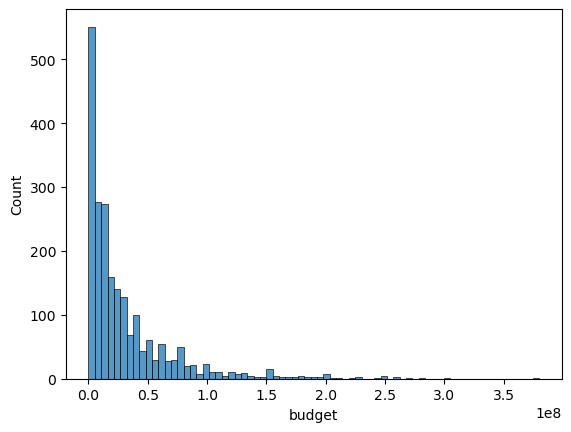

In [1382]:
sns.histplot(df['budget'])

In [1383]:
# concat all the catogories
df.select_dtypes('O').sample(1)

,genres,original_language,production_companies,production_countries,spoken_languages,Keywords,cast,crew
2417,family fantasy,en,paramountpictures davidl,unitedstatesofamerica,en fr de,chocolate factoryworker basedonnovel candy tva...,genewilder jackalbertson peterostrum roykinnea...,roalddahl roalddahl walterscharf melstuart sta...


In [1384]:
df['catogeries'] = ''
for feature in df.select_dtypes('O').columns:
    df['catogeries'] = df['catogeries'] +' '+ df[feature]

In [1385]:
df['catogeries'] = df['catogeries'].str.strip()

In [1386]:
# drop other catogories column
final_df = df.select_dtypes(include=['int',float])
final_df['catogeries'] = df['catogeries']

In [1387]:
final_df = final_df[['budget', 'popularity', 'runtime', 'standalone_movie',
       'release_year', 'release_month', 'catogeries', 'revenue']]

In [1388]:
cv = CountVectorizer(max_features=1000)

In [1389]:
pd.DataFrame(cv.fit_transform(df['catogeries']).toarray(),columns=cv.get_feature_names_out())

,aaroneckhart,aaronzigman,action,adamgreenberg,adamjenkins,adamsandler,adamscott,adultery,adventure,aftercreditsstinger,afterlife,airplane,airport,akivagoldsman,alanparker,alansilvestri,albertgasser,alcohol,alcoholic,alecbaldwin,alexandredesplat,alfredhitchcock,alfredmolina,aliciastevenson,alien,allencovert,allenhall,allisonjanney,alpacino,amandamackey,amandapeet,amblinentertainment,american,americanzoetrope,amnesia,amyadams,andrewstanton,android,angelabassett,animation,annefletcher,annemccarthy,annroth,anthonyhopkins,anthonymackie,antoniobanderas,apartment,apocalyptic,ar,army,arnoldschwarzenegger,arnonmilchan,artificialintelligence,artlinson,ashleyjudd,ashokamritraj,assassin,assassination,australia,author,avykaufman,baby,bar,barbaraharris,barrylevinson,baseball,basedoncomic,basedonnovel,basedonplayormusical,basedontruestory,basedontvseries,basedonvideogame,basedonyoungadultnovel,battle,bbcfilms,beach,becominganadult,belgium,bell,benaffleck,beniciodeltoro,benkingsley,benstiller,bestfriend,bethgrant,bettemidler,billconti,billcorso,billmurray,billpaxton,billpullman,billybobthornton,billyhopkins,billywilder,biography,blackmail,blackpeople,blakeedwards,blood,blumhouseproductions,bobweinstein,bomb,bonnietimmermann,boxer,braddourif,bradleycooper,bradpitt,brazil,brendangleeson,brettratner,brianavery,briancox,briandennehy,briandepalma,briangrazer,brianhelgeland,briantyler,brotherbrotherrelationship,brothersisterrelationship,bruceberman,brucecampbell,brucegreenwood,brucemcgill,brucewillis,california,camerondiaz,camillefriend,canada,canal,cancer,carchase,carcrash,career,carlagugino,carolcopictures,carterburwell,caryelwes,castle,castlerockentertainment,cateblanchett,catherinekeener,cathysandrich,channingtatum,charliechaplin,charliesheen,charlizetheron,charltonheston,chase,cheechmarin,chicago,china,chriscolumbus,chriscooper,chrisrock,christianbale,christmas,christophebeck,christopherassells,christopherboyes,christopherlee,christophernolan,christopherplummer,christopherwalken,christopheryoung,cia,cillianmurphy,cin,claudevandamme,claytontownsend,cliffcurtis,clinteastwood,clintmansell,cn,colinanderson,colinfarrell,colleenatwood,colleencamp,college,columbiapictures,columbiapicturescorporation,comedy,comingofage,competition,computer,conspiracy,cop,coreenmayrs,corruption,craighenighan,crime,criminal,cs,czechrepublic,da,danaykroyd,dancing,danhedaya,danhegeman,danielcraig,dannydevito,dannyelfman,dannyhuston,dannytrejo,dariuszwolski,darkcomedy,darrenaronofsky,daughter,davidayer,davidbrown,davidkoechner,davidnewman,davidrubin,davidsiegel,dccomics,de,deancundey,deannorris,deansemler,death,debbiemcwilliams,deborahaquila,debrazane,deception,demon,denisechamian,denmark,dennishaysbert,dennishopper,dennisliddiard,dennismcneill,dennisquaid,denzelwashington,desert,detective,dianekeaton,dianelane,dimensionfilms,dinosaur,divorce,doctor,documentary,dog,donaldsutherland,donbluth,doncarmody,dottiestarling,doughemphill,douglasaibel,drama,dream,dreamworksskg,drewbarrymore,drug,drugaddiction,drugdealer,duanemanwiller,duneentertainment,duneentertainmentiii,duringcreditsstinger,dustinhoffman,dwaynejohnson,dyinganddeath,dylangoss,dystopia,eddiemarsan,eddiemurphy,edharris,edithhead,edwardburns,el,elijahwood,eliroth,elizabethbanks,ellenchenoweth,ellenlewis,emmathompson,en,england,eonproductions,epsilonmotionpictures,ericaedellphillips,ericfellner,erwinstoff,es,escape,ethanhawke,eugenelevy,europacorp,evamendes,ewanmcgregor,ex,explosion,extramaritalaffair,fa,faith,family,familyrelationships,famkejanssen,fantasy,fathersonrelationship,fbi,fbiagent,femalenudity,fight,film,fire,flashback,focusfeatures,foreign,forest,forestwhitaker,foundfootage,fox,foxsearchlightpictures,fr,france,francesconroy,francinemaisler,francisfordcoppola,frankgrillo,franklangella,frankmarshall,frankwelker,friends,friendship,funeral,future,gabrielbyrne,galeannehurd,gang,gangster,garybarber,garylucchesi,garyoldman,garyrydstrom,gaumont,gay,genehackman,geoffreyrush,georgeclooney,georgelucas,georgemiller,g

In [1390]:
final_df['budget'].fillna(df['budget'].median(),inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\607696465.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['budget'].fillna(df['budget'].median(),inplace=True)


In [1391]:
final_df.describe().applymap(lambda x:f"{x:.0f}")

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\2234344620.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df.describe().applymap(lambda x:f"{x:.0f}")


,budget,popularity,runtime,standalone_movie,release_year,release_month,revenue
count,2996,2996,2996,2996,2996,2996,2996
mean,26881546,8,108,1,2006,7,66810292
std,35036573,12,21,0,17,3,137604541
min,1,0,11,0,1974,1,1
25%,9000000,4,95,1,1996,4,2401550
50%,16000000,7,104,1,2006,7,16846564
75%,29000000,11,118,1,2012,10,68960786
max,380000000,294,338,1,2073,12,1519557910


In [1392]:
# data with 2071,2,3,
# data with revenue of 2
# outliers in the data

In [1393]:
final_df['release_year'] = final_df['release_year'].apply(lambda x:np.nan if x > 2023 else x)

In [1394]:
final_df['release_year'].fillna(final_df['release_year'].median(),inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\3918531822.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['release_year'].fillna(final_df['release_year'].median(),inplace=True)


In [1395]:
final_df = final_df.query('popularity<30')

<Axes: xlabel='budget', ylabel='Count'>

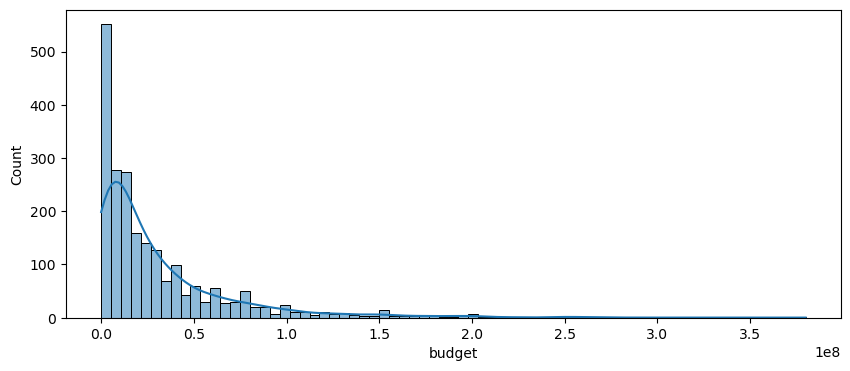

In [1396]:
plt.figure(figsize=(10,4))
sns.histplot(df['budget'],kde=True)

In [1397]:
final_df['budget'] = final_df['budget'].apply(lambda x:final_df['budget'].median() if x<600 else x )

<Axes: >

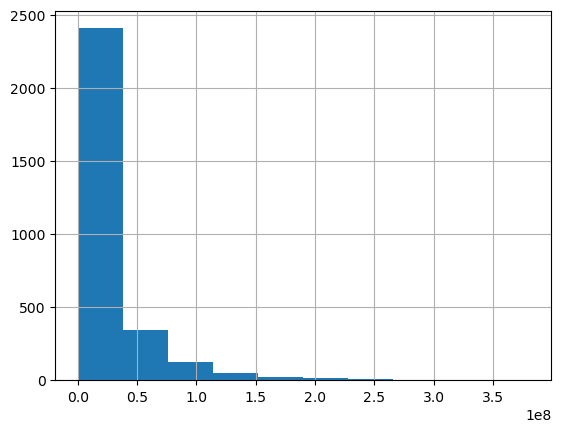

In [1398]:
final_df['budget'].hist()

In [1399]:
pwr = PowerTransformer()

In [1400]:
final_df = final_df.query('runtime>70 and runtime<230')

<Axes: ylabel='Count'>

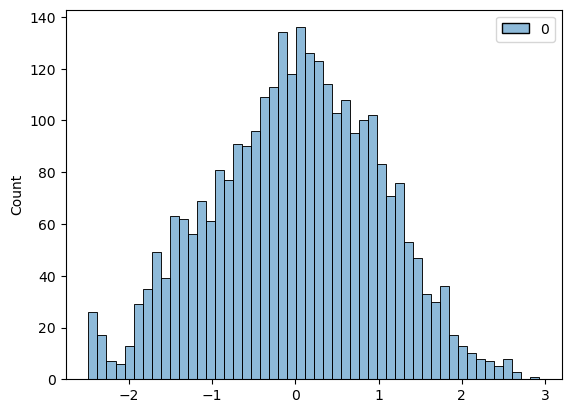

In [1401]:
sns.histplot(pwr.fit_transform(final_df[['revenue']]),bins=50)

<Axes: ylabel='revenue'>

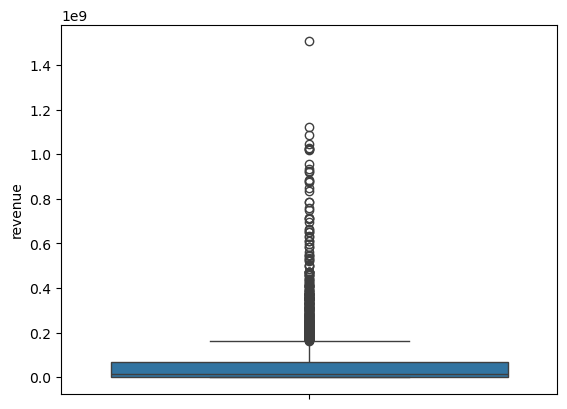

In [1402]:
sns.boxplot(final_df['revenue'])

In [1403]:
final_df.drop(final_df.query('revenue>800000000').index,inplace=True)

In [1404]:
pt = PowerTransformer()

In [1405]:
list(enumerate(final_df.columns))

[(0, 'budget'),
 (1, 'popularity'),
 (2, 'runtime'),
 (3, 'standalone_movie'),
 (4, 'release_year'),
 (5, 'release_month'),
 (6, 'catogeries'),
 (7, 'revenue')]

In [1406]:
clf = ColumnTransformer([
    ('pt',PowerTransformer(),[0,1,2]),
    ('std',StandardScaler(),[4,5]),
    ('cv',CountVectorizer(max_features=500),6)
    ],remainder='passthrough')

In [1407]:
final_df['catogeries'].isna().sum()

0

In [1408]:
X = final_df.drop(columns='revenue')
y = final_df['revenue']

In [1409]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [1410]:
# def model_evaluation(model):
#     pipe_model = (Pipeline([('prep',clf),
#                             ('model',TransformedTargetRegressor(transformer=PowerTransformer(),
#                                                                 regressor=model))
#             ]))
#     print(-cross_val_score(pipe_model,X_train,y_train,cv=4,scoring='neg_root_mean_squared_log_error'))
#     print(cross_val_score(pipe_model,X_train,y_train,cv=4,scoring='r2'))
#     print(np.mean(-cross_val_score(pipe_model,X_train,y_train,cv=4,scoring='neg_root_mean_squared_log_error')))
    

In [1411]:
# model_evaluation(RandomForestRegressor(max_depth=17
#                                        ,min_samples_split=35))

In [1412]:
# model_evaluation(SVR(C=1))

In [1413]:
# model_evaluation(VotingRegressor(estimators=[
#                                             ('rf',RandomForestRegressor(max_depth=17,min_samples_split=35)),
#                                             ('svr',SVR(C=1)),
#                                             ('xgb',XGBRegressor())
#                                             ]))

In [1414]:
# model_evaluation(VotingRegressor(estimators=[
#                                             ('rf',RandomForestRegressor(max_depth=17,min_samples_split=35)),
#                                             ('svr',SVR(C=1))
#                                             ]))

In [1415]:
# model_evaluation(BaggingRegressor(estimator=RandomForestRegressor(max_depth=17,min_samples_split=35,n_jobs=4),n_jobs=3))

In [1416]:
model = VotingRegressor(estimators=[
                                    ('rf',RandomForestRegressor(max_depth=17,min_samples_split=35)),
                                    ('svr',SVR(C=1)),
                                    ('xgb',XGBRegressor())
                                    ])

In [1417]:

pipe_model = (Pipeline([('prep',clf),
                        ('model',TransformedTargetRegressor(transformer=PowerTransformer(),
                                                            regressor=model)
                                                            )
                                                            ]))

In [1418]:
pipe_model

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pt', PowerTransformer(),
                                                  [0, 1, 2]),
                                                 ('std', StandardScaler(),
                                                  [4, 5]),
                                                 ('cv',
                                                  CountVectorizer(max_features=500),
                                                  6)])),
                ('model',
                 TransformedTargetRegressor(regressor=VotingRegressor(estimators=[('rf',
                                                                                   RandomForestRegressor(max_depth=17,
                                                                                                         min_samples_split=35)),
                                                                                  ('svr',
                                                                                   SVR(C=1)),
                                                                                  ('xg...
                                                                                                interaction_constraints=None,
                                                                                                learning_rate=None,
                                                                                                max_bin=None,
                                                                                                max_cat_threshold=None,
                                                                                                max_cat_to_onehot=None,
                                                                                                max_delta_step=None,
                                                                                                max_depth=None,
                                                                                                max_leaves=None,
                                                                                                min_child_weight=None,
                                                                                                missing=nan,
                                                                                                monotone_constraints=None,
                                                                                                multi_strategy=None,
                                                                                                n_estimators=None,
                                                                                                n_jobs=None,
                                                                                                num_parallel_tree=None,
                                                                                                random_state=None, ...))]),
                                            transformer=PowerTransformer()))])

In [1419]:
pipe_model.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pt', PowerTransformer(),
                                                  [0, 1, 2]),
                                                 ('std', StandardScaler(),
                                                  [4, 5]),
                                                 ('cv',
                                                  CountVectorizer(max_features=500),
                                                  6)])),
                ('model',
                 TransformedTargetRegressor(regressor=VotingRegressor(estimators=[('rf',
                                                                                   RandomForestRegressor(max_depth=17,
                                                                                                         min_samples_split=35)),
                                                                                  ('svr',
                                                                                   SVR(C=1)),
                                                                                  ('xg...
                                                                                                interaction_constraints=None,
                                                                                                learning_rate=None,
                                                                                                max_bin=None,
                                                                                                max_cat_threshold=None,
                                                                                                max_cat_to_onehot=None,
                                                                                                max_delta_step=None,
                                                                                                max_depth=None,
                                                                                                max_leaves=None,
                                                                                                min_child_weight=None,
                                                                                                missing=nan,
                                                                                                monotone_constraints=None,
                                                                                                multi_strategy=None,
                                                                                                n_estimators=None,
                                                                                                n_jobs=None,
                                                                                                num_parallel_tree=None,
                                                                                                random_state=None, ...))]),
                                            transformer=PowerTransformer()))])

In [1420]:
test = pd.read_csv('./test.csv')

In [1421]:
test.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [1422]:
test = test[['id', 'belongs_to_collection', 'budget', 'genres','original_language','popularity', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages','tagline', 'Keywords', 'cast', 'crew']]

In [1423]:
dict_columns = ['belongs_to_collection','genres','production_companies','production_countries','spoken_languages','Keywords','cast','crew']

In [1424]:
for feature in dict_columns:
   test[feature] = test[feature].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else {})

   test[feature] = test[feature].apply(lambda x:[dic['name'] for dic in x ] if x!={} else [])

In [1425]:
test['standalone_movie'] = test['belongs_to_collection'].apply(lambda x:len(x))

In [1426]:
for feature in dict_columns:
    test[feature] = test[feature].apply(lambda x:' '.join([i.replace(' ','').lower() for i in x]) if x!=[] else '')

In [1427]:
test['catogeries'] =''
for feature in dict_columns:
    test['catogeries'] = test['catogeries'] + test[feature] + ' '

In [1428]:
test.head()

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,Keywords,cast,crew,standalone_movie,catogeries
0,3001,pokémoncollection,0,adventure animation family fantasy,ja,3.851534,,japan unitedstatesofamerica,7/14/07,90.0,english 日本語,Somewhere Between Time & Space... A Legend Is ...,pok√©mon pocketmonsters,craigblair emilybauer sarahnatochenny ikue≈åta...,kunihikoyuyama hidekisonoda,1,pokémoncollection adventure animation family f...
1,3002,,88000,horror sciencefiction,en,3.559789,woolnerbrotherspicturesinc.,unitedstatesofamerica,5/19/58,65.0,english,A titanic beauty spreads a macabre wave of hor...,revenge alien bmovie cheatinghusband violence ...,allisonhayes williamhudson yvettevickers roygo...,edwardmann jacquesr.marquette jacquesr.marquet...,0,horror sciencefiction woolnerbrotherspictures...
2,3003,,0,comedy romance,en,8.085194,warnerbros. outlawproductions(i) miramax,unitedstatesofamerica,5/23/97,100.0,english,A Comedy About Lost Loves And Last Laughs,jealousy love revenge break-up,megryan matthewbroderick kellypreston tch√©kyk...,griffindunne robertf.newmyer jeffreysilver rac...,0,comedy romance warnerbros. outlawproductions(...
3,3004,,6800000,drama war mystery,fr,8.596012,tsproductions microscope phigroup,canada france,9/4/10,130.0,français العربية english,The search began at the opening of their mothe...,prison middleeast rape muslim militia interpre...,lubnaazabal m√©lissad√©sormeaux-poulin maximga...,louiscraig lucierobitaille gillessacuto mil√©n...,0,drama war mystery tsproductions microscope ph...
4,3005,,2000000,history documentary,en,3.217680,,unitedstatesofamerica,2/11/05,92.0,english,It was filmed in 6 days for 25 thousand dollar...,usa 1970s sexualrevolution unsimulatedsex,dennishopper peterbart warrenbeatty carlbernstein,briangrazer kimroth ronhoward fentonbailey fen...,0,history documentary unitedstatesofamerica en...


In [1429]:
test.drop(columns=dict_columns,inplace=True)

In [1430]:
test.head()

,id,budget,original_language,popularity,release_date,runtime,tagline,standalone_movie,catogeries
0,3001,0,ja,3.851534,7/14/07,90.0,Somewhere Between Time & Space... A Legend Is ...,1,pokémoncollection adventure animation family f...
1,3002,88000,en,3.559789,5/19/58,65.0,A titanic beauty spreads a macabre wave of hor...,0,horror sciencefiction woolnerbrotherspictures...
2,3003,0,en,8.085194,5/23/97,100.0,A Comedy About Lost Loves And Last Laughs,0,comedy romance warnerbros. outlawproductions(...
3,3004,6800000,fr,8.596012,9/4/10,130.0,The search began at the opening of their mothe...,0,drama war mystery tsproductions microscope ph...
4,3005,2000000,en,3.217680,2/11/05,92.0,It was filmed in 6 days for 25 thousand dollar...,0,history documentary unitedstatesofamerica en...


In [1431]:
test['catogeries'] = test['catogeries'] + test['tagline'].str.lower() +test['original_language']

In [1432]:
test.drop('tagline',axis=1,inplace=True)

In [1433]:
test_id = test['id']

In [1434]:
test.drop(['id','original_language'],axis=1,inplace=True)

In [1435]:
test['release_date'] = pd.to_datetime(test['release_date'])

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\4076686011.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['release_date'] = pd.to_datetime(test['release_date'])


In [1436]:
test['release_year'] = test['release_date'].dt.year
test['release_month'] = test['release_date'].dt.month

In [1437]:
X_train

,budget,popularity,runtime,standalone_movie,release_year,release_month,catogeries
849,16000000.0,8.159556,87.0,1,2005.0,2,drama comedy en unitedartists charleschaplinpr...
1940,30000000.0,5.188399,106.0,1,1995.0,8,action crime sciencefiction thriller en paramo...
690,16000000.0,4.074783,104.0,1,2005.0,12,comedy drama romance en grandonproductions uni...
712,40000000.0,13.876881,120.0,1,2006.0,2,adventure drama family en waltdisneypictures s...
2118,21000000.0,14.074906,117.0,1,2002.0,9,romance drama en punchproductions touchstonepi...
...,...,...,...,...,...,...,...
1671,15000000.0,12.860385,101.0,1,1996.0,5,drama fantasy horror thriller en columbiapictu...
1117,40000000.0,12.520688,114.0,1,2001.0,11,comedy romance en twentiethcenturyfoxfilmcorpo...
1154,27000000.0,9.848674,117.0,1,1983.0,7,fantasy action adventure en columbiapicturesco...
1321,65000000.0,18.860681,123.0,0,2004.0,12,sciencefiction action horror thriller adventur...


In [1438]:
test.drop('release_date',axis=1,inplace=True)

In [1441]:
test = test[['budget', 'popularity', 'runtime', 'standalone_movie',
       'release_year', 'release_month', 'catogeries']]

In [1447]:
test['runtime'].fillna(test['runtime'].mean(),inplace=True)
test['release_month'].fillna(test['release_month'].mean(),inplace=True)
test['release_year'].fillna(test['release_month'].mean(),inplace=True)
test['catogeries'].fillna('',inplace=True)

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\4126203707.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['runtime'].fillna(test['runtime'].mean(),inplace=True)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\4126203707.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [1448]:
test.isna().sum()

budget              0
popularity          0
runtime             0
standalone_movie    0
release_year        0
release_month       0
catogeries          0
dtype: int64

In [1452]:
y_pred = pipe_model.predict(test)

In [1456]:
submission_df = test_id.to_frame()['revenue'] = y_pred

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19784\2421372815.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_id.to_frame()['revenue'] = y_pred


In [ ]:
test